# EDA Overview and guide

Import Packages

In [8]:
import pandas as pd
import numpy as np


## Import datasets

Here we will have 3 data sets Inflation and Unemployment rate (Unrate) will serve and independent variables to analyze the effect on Federal Funds Rate

Ensure to include, why this matters in your notebook

In [9]:
inflation = pd.read_csv('CORESTICKM159SFRBATL.csv')

In [10]:
inflation.head()

,DATE,CORESTICKM159SFRBATL
0,1967-12-01,3.383497
1,1968-01-01,3.659987
2,1968-02-01,3.682012
3,1968-03-01,4.151668
4,1968-04-01,4.165427


In [11]:
unRate = pd.read_csv('UNRATE.csv')

In [12]:
unRate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [13]:
fedRate =  pd.read_csv('DFF.csv')

In [14]:
fedRate.head()

,DATE,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


### This is all daily data but for all three to have the same start date 1968 is the farthest back in time. 

In [15]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  665 non-null    object 
 1   CORESTICKM159SFRBATL  665 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [16]:
unRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    905 non-null    object 
 1   UNRATE  905 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.3+ KB


In [17]:
fedRate.head()

,DATE,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


## Just as I suspected, the date is in string format and will not filter well. This needs to be converted

In [20]:
# This code will take the column of the data and apply the pandas function to_datetime to convert 
# the date from string format to numeric date format

inflation['DATE'] = pd.to_datetime(inflation['DATE'])
unRate['DATE'] = pd.to_datetime(unRate['DATE'])
fedRate['DATE'] = pd.to_datetime(fedRate['DATE'])

### Lets take a look at the Dtype changes now

In [23]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  665 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  665 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.5 KB


In [22]:
unRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    905 non-null    datetime64[ns]
 1   UNRATE  905 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.3 KB


In [24]:
fedRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25174 entries, 0 to 25173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25174 non-null  datetime64[ns]
 1   DFF     25174 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 393.5 KB


### Notice the Dtype has changed from object to datetime64

### Now lets take a look at dropping all the data prior to 1967

In [28]:
# Here we will use basic operators to trim the data

threshold_year = 1968

In [29]:
# Here I am adding C to the end of each dataset name to indicate it is the clean data

inflationC = inflation[inflation['DATE'].dt.year >= threshold_year]
unRateC = unRate[unRate['DATE'].dt.year >= threshold_year]
fedRateC = fedRate[fedRate['DATE'].dt.year >= threshold_year]

## Lets Check our Work

In [48]:
inflationC.head()

,CORESTICKM159SFRBATL
DATE,
1968-01-01,3.659987
1968-02-01,3.682012
1968-03-01,4.151668
1968-04-01,4.165427
1968-05-01,4.097704


In [32]:
unRateC.head()

,DATE,UNRATE
240,1968-01-01,3.7
241,1968-02-01,3.8
242,1968-03-01,3.7
243,1968-04-01,3.5
244,1968-05-01,3.5


In [33]:
fedRateC.head()

,DATE,DFF
4932,1968-01-01,4.50
4933,1968-01-02,4.63
4934,1968-01-03,4.25
4935,1968-01-04,4.63
4936,1968-01-05,4.75


# Now plot them individually and together using matplotlib. 

typically your import should be at the top of the page with the others, this is here to show you the library used for the plots

In [37]:
import matplotlib.pyplot as plt

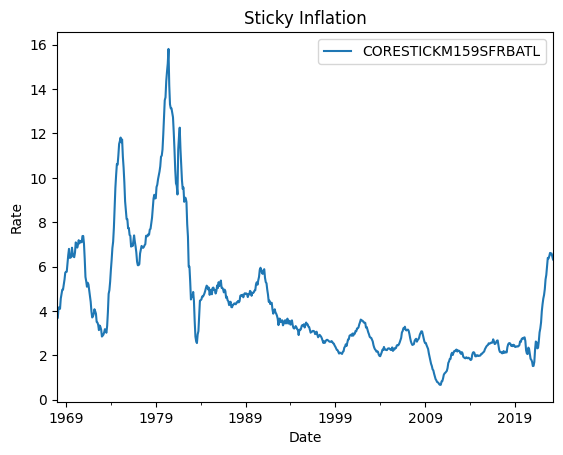

In [49]:
# Inflation

# Plotting the variables over time
inflationC.plot()
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Sticky Inflation')
plt.legend()
plt.show()

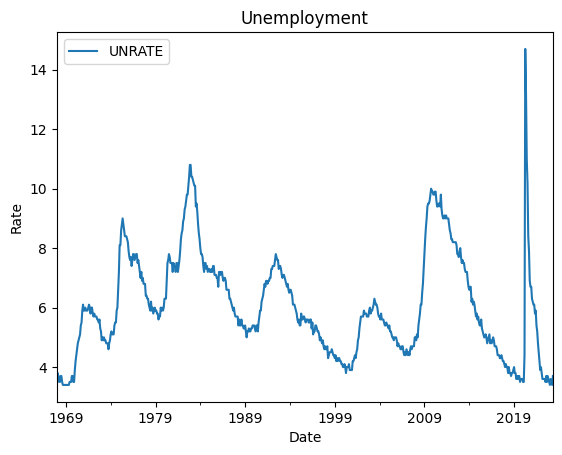

In [57]:
# Unemployment


# Plotting the variables over time
unRateC.plot()
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Unemployment')
plt.legend()
plt.show()

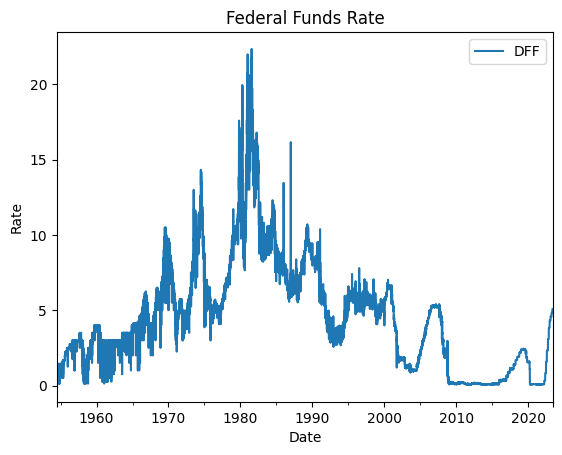

In [60]:
# Federal Funds Rate

# Set the 'Date' column as the index
fedRate.set_index('DATE', inplace=True)


# Plotting the variables over time
fedRate.plot()
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Federal Funds Rate')
plt.legend()
plt.show()

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt


In [2]:
GDP = pd.read_csv('GDP.csv')

In [3]:
GDP.columns

Index(['DATE', 'GDP'], dtype='object')

### This is all daily data but for all three to have the same start date 1968 is the farthest back in time. 

In [4]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    305 non-null    object 
 1   GDP     305 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [5]:


# # Rename columns at index 0 and 1
# GDP.rename(columns={0: 'Date', 1: 'gdp'}, inplace=True)

# # Print the updated DataFrame
# GDP.head()


In [6]:
# GDP.info()

In [7]:
GDP['date'] = pd.to_datetime(GDP['DATE'])

In [8]:
GDP.columns

Index(['DATE', 'GDP', 'date'], dtype='object')

In [9]:
GDP.head()

,DATE,GDP,date
0,1947-01-01,243.164,1947-01-01
1,1947-04-01,245.968,1947-04-01
2,1947-07-01,249.585,1947-07-01
3,1947-10-01,259.745,1947-10-01
4,1948-01-01,265.742,1948-01-01


NameError: name 'plt' is not defined

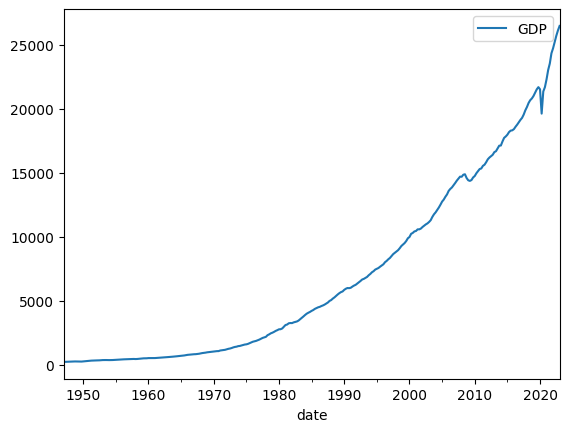

In [10]:
# Federal Funds Rate

# Set the 'Date' column as the index
GDP.set_index('date', inplace=True)


# Plotting the variables over time
GDP.plot()
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('GDP')
plt.legend()
plt.show()

In [14]:
# Federal Funds Rate

# Set the 'Date' column as the index
GDP.set_index('date', inplace=True)


# Plotting the variables over time
GDP.plot()
# plt.xlabel('Date')
# plt.ylabel('Rate')
# plt.title('GDP')
# plt.legend()
# plt.show()

KeyError: "None of ['date'] are in the columns"